# Installing Package & Importing Data

In [1]:
# !pip install nltk
# !pip install afinn
# !pip install wordcloud

import pandas as pd
import re
from afinn import Afinn
import numpy as np
import xgboost as xgb

import nltk
# from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import FreqDist 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import seaborn as sns

#ML libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB # import naive bayes
from sklearn.tree import DecisionTreeClassifier # import Decision Tree
from sklearn.ensemble import RandomForestClassifier # import random forest

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Download stopwords and wordnet from NLTK
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chiehlinghuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chiehlinghuang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('04232023_Southwest_labelled_data_.csv')
df = df.drop(columns = 'Assignee')
df = df.dropna(subset=['result']) #drop row without label 

In [3]:
df.head()

,text,result
0,Bullshit @Jim_Jordan! Trump and his failed res...,No response needed
1,Let's try this one more more time @SouthwestAi...,Others - help needed
2,Hey @PeteButtigieg - you were pointing the fin...,No response needed
3,#SouthwestAirlines @SouthwestAir Got my refund...,No response needed
4,Your girl is out here matching with the @South...,No response needed


No response needed               2294
Refund Request & Status Help      204
Rapid Rewards Help                155
Others - help needed              151
Baggage Help                      115
Flight Changes & Cancellation      46
Seats Help                          2
Covid19                             1
Name: result, dtype: int64

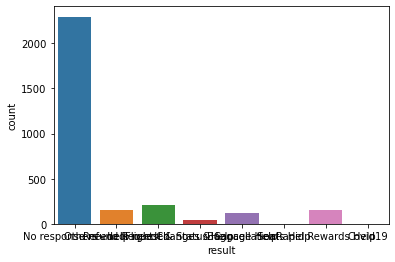

In [4]:
# plt.xticks(rotation=90)
ax = sns.countplot(x="result",data=df)
df['result'].value_counts()

# Data Preprocessing

In [5]:
# create a list text
text = list(df['text']) 

# preprocessing loop
lemmatizer = WordNetLemmatizer()

#dictionary of high freq words 
sw_highfreq_words = ['southwestair' , 'http', 'co', 'https', 'southwest airlines', 'southwest', 'airline', 'airlines']

#preprocess each text in list and append to corpus 
processed_text = []
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [word for word in r if word not in sw_highfreq_words]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    processed_text.append(r)

corpus_freq_noun = []
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = word_tokenize(r)
    r = [word for word in r if word not in stopwords.words('english')]
    r = [word for word in r if word.lower() not in sw_highfreq_words]
    r = ' '.join(r)
    corpus_freq_noun.append(r)

corpus_sentiment = []
stop_words = set(stopwords.words('english'))
stop_words = stop_words - set(["when", "where"])
for i in range(len(text)):
    r = re.sub(r'[^\w\s\?]+', ' ', text[i])
    r = r.lower()
    r = word_tokenize(r)
    #r = [word for word in r if word not in stop_words]
    r = [word for word in r if word not in sw_highfreq_words]
    #r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus_sentiment.append(r)

#assign corpus to data['text'] (add corpus back to datafram)
df['processed_text'] = processed_text
df['corpus_freq_noun'] = corpus_freq_noun
df['corpus_sentiment'] = corpus_sentiment

In [6]:
df.head()

,text,result,processed_text,corpus_freq_noun,corpus_sentiment
0,Bullshit @Jim_Jordan! Trump and his failed res...,No response needed,bullshit jim jordan trump failed response covi...,Bullshit Jim Jordan Trump failed response Covi...,bullshit jim_jordan trump and his failed respo...
1,Let's try this one more more time @SouthwestAi...,Others - help needed,let try one time help follow case number speci...,Let try one time Who help follow case number S...,let s try this one more more time who can help...
2,Hey @PeteButtigieg - you were pointing the fin...,No response needed,hey petebuttigieg pointing finger pretty hard ...,Hey PeteButtigieg pointing finger pretty hard ...,hey petebuttigieg you were pointing the finger...
3,#SouthwestAirlines @SouthwestAir Got my refund...,No response needed,southwestairlines got refund today advised cho...,SouthwestAirlines Got refund today Just advise...,southwestairlines got my refund today just be ...
4,Your girl is out here matching with the @South...,No response needed,girl matching monitor bna aup wbyzx,Your girl matching monitors BNA Aup wBYzX,your girl is out here matching with the monito...


# Exploratory Analysis - Word Cloud & Frequency Distribution

In [7]:
df_no_response =  df.loc[df['result'] == 'No response needed']
df_refund_req = df.loc[df['result'] == 'Refund Request & Status Help']
df_others = df.loc[df['result'] == 'Others - help needed']
df_baggage = df.loc[df['result'] == 'Baggage Help']
df_flight_changes = df.loc[df['result'] == 'Flight Changes & Cancellation']
df_rapid_rewards = df.loc[df['result'] == 'Rapid Rewards Help']

## 1. Top 30 Frequent Words

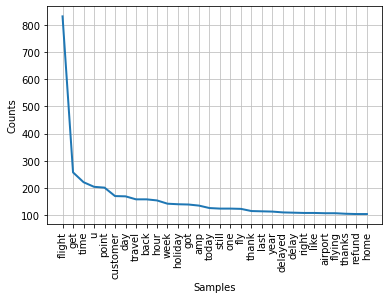

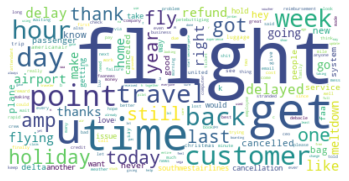

[('flight', 831), ('get', 258), ('time', 222), ('u', 205), ('point', 202), ('customer', 171), ('day', 170), ('travel', 159), ('back', 159), ('hour', 155), ('week', 143), ('holiday', 141), ('got', 140), ('amp', 136), ('today', 127), ('still', 125), ('one', 125), ('fly', 124), ('thank', 116), ('last', 115), ('year', 114), ('delayed', 111), ('delay', 110), ('right', 109), ('like', 109), ('airport', 108), ('flying', 108), ('thanks', 106), ('refund', 105), ('home', 105)]


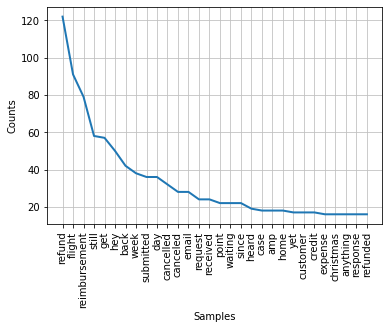

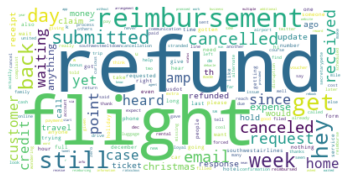

[('refund', 122), ('flight', 91), ('reimbursement', 79), ('still', 58), ('get', 57), ('hey', 50), ('back', 42), ('week', 38), ('submitted', 36), ('day', 36), ('cancelled', 32), ('canceled', 28), ('email', 28), ('request', 24), ('received', 24), ('point', 22), ('waiting', 22), ('since', 22), ('heard', 19), ('case', 18), ('amp', 18), ('home', 18), ('yet', 17), ('customer', 17), ('credit', 17), ('expense', 16), ('christmas', 16), ('anything', 16), ('response', 16), ('refunded', 16)]


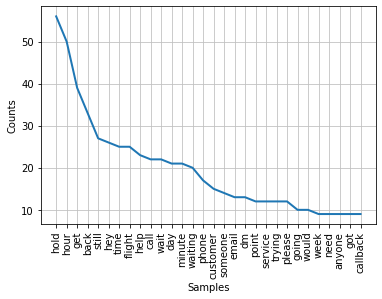

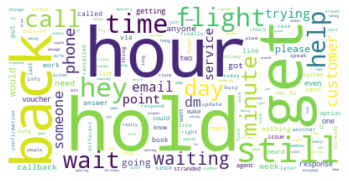

[('hold', 56), ('hour', 50), ('get', 39), ('back', 33), ('still', 27), ('hey', 26), ('time', 25), ('flight', 25), ('help', 23), ('call', 22), ('wait', 22), ('day', 21), ('minute', 21), ('waiting', 20), ('phone', 17), ('customer', 15), ('someone', 14), ('email', 13), ('dm', 13), ('point', 12), ('service', 12), ('trying', 12), ('please', 12), ('going', 10), ('would', 10), ('week', 9), ('need', 9), ('anyone', 9), ('got', 9), ('callback', 9)]


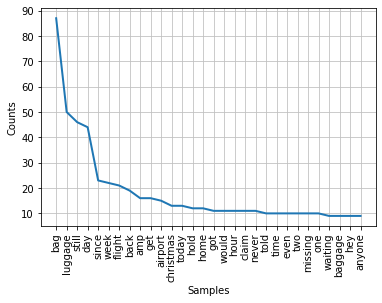

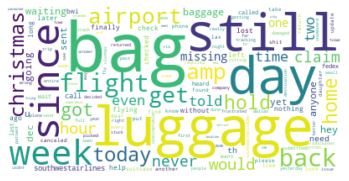

[('bag', 87), ('luggage', 50), ('still', 46), ('day', 44), ('since', 23), ('week', 22), ('flight', 21), ('back', 19), ('amp', 16), ('get', 16), ('airport', 15), ('christmas', 13), ('today', 13), ('hold', 12), ('home', 12), ('got', 11), ('would', 11), ('hour', 11), ('claim', 11), ('never', 11), ('told', 10), ('time', 10), ('even', 10), ('two', 10), ('missing', 10), ('one', 10), ('waiting', 9), ('baggage', 9), ('hey', 9), ('anyone', 9)]


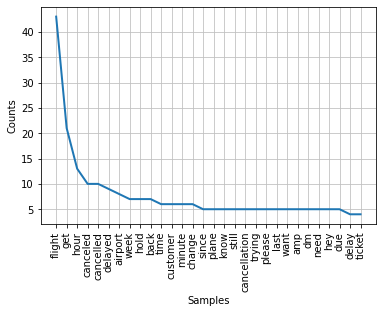

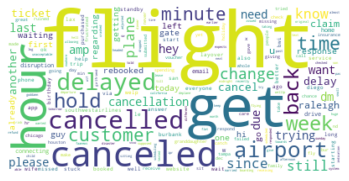

[('flight', 43), ('get', 21), ('hour', 13), ('canceled', 10), ('cancelled', 10), ('delayed', 9), ('airport', 8), ('week', 7), ('hold', 7), ('back', 7), ('time', 6), ('customer', 6), ('minute', 6), ('change', 6), ('since', 5), ('plane', 5), ('know', 5), ('still', 5), ('cancellation', 5), ('trying', 5), ('please', 5), ('last', 5), ('want', 5), ('amp', 5), ('dm', 5), ('need', 5), ('hey', 5), ('due', 5), ('delay', 4), ('ticket', 4)]


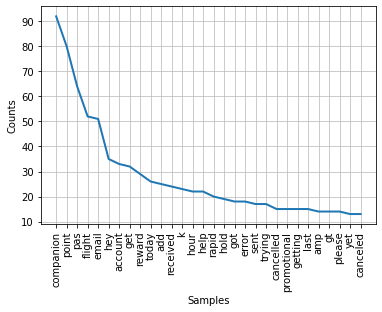

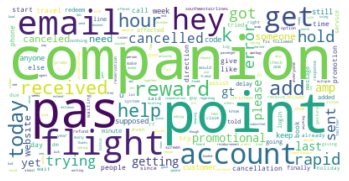

[('companion', 92), ('point', 80), ('pas', 64), ('flight', 52), ('email', 51), ('hey', 35), ('account', 33), ('get', 32), ('reward', 29), ('today', 26), ('add', 25), ('received', 24), ('k', 23), ('hour', 22), ('help', 22), ('rapid', 20), ('hold', 19), ('got', 18), ('error', 18), ('sent', 17), ('trying', 17), ('cancelled', 15), ('promotional', 15), ('getting', 15), ('last', 15), ('amp', 14), ('gt', 14), ('please', 14), ('yet', 13), ('canceled', 13)]


In [9]:
def freqdistribution(text_column):
    
    #join all tweets into a single string and tokenize 
    content_list = list(text_column)
    content_string = ' '.join(content_list)
    content_tokens = nltk.word_tokenize(content_string)
    
    #get the frequency distribution
    freq = FreqDist(content_tokens)
    sorted_freq = sorted(freq.items(),key = lambda k:k[1], reverse = True) 
    
    #plot word frequency
    freq.plot(30)
    
    #generate wordcloud
    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    #print and save top 30 words
    print(sorted_freq[:30])
    return sorted_freq[:30] 

#get top 30 highest frequency words by applying function -- also shows word cloud and freq dist chart
top_30_noresponse = freqdistribution(df_no_response['processed_text'])   
top_30_ref_req = freqdistribution(df_refund_req['processed_text'])
top_30_others= freqdistribution(df_others['processed_text'])
top_30_baggage = freqdistribution(df_baggage['processed_text'])
top_30_flight_changes = freqdistribution(df_flight_changes['processed_text'])
top_30_rapid_rewards = freqdistribution(df_rapid_rewards['processed_text'])

## 2. Top 30 Frequent Nouns

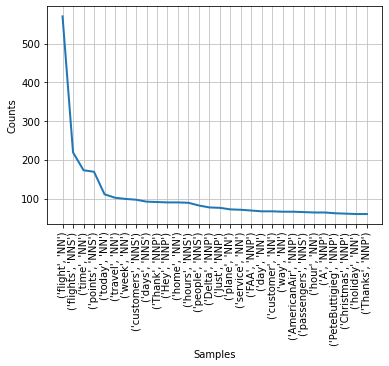

[(('flight', 'NN'), 570), (('flights', 'NNS'), 219), (('time', 'NN'), 173), (('points', 'NNS'), 169), (('today', 'NN'), 111), (('travel', 'NN'), 102), (('week', 'NN'), 99), (('customers', 'NNS'), 97), (('days', 'NNS'), 92), (('Thank', 'NNP'), 91), (('Hey', 'NNP'), 90), (('home', 'NN'), 90), (('hours', 'NNS'), 89), (('people', 'NNS'), 82), (('Delta', 'NNP'), 77), (('Just', 'NNP'), 76), (('plane', 'NN'), 72), (('service', 'NN'), 71), (('FAA', 'NNP'), 69), (('day', 'NN'), 67), (('customer', 'NN'), 67), (('way', 'NN'), 66), (('AmericanAir', 'NNP'), 66), (('passengers', 'NNS'), 65), (('hour', 'NN'), 64), (('A', 'NNP'), 64), (('PeteButtigieg', 'NNP'), 62), (('Christmas', 'NNP'), 61), (('holiday', 'NN'), 60), (('Thanks', 'NNP'), 60)]


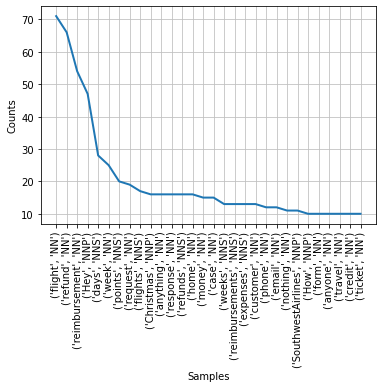

[(('flight', 'NN'), 71), (('refund', 'NN'), 66), (('reimbursement', 'NN'), 54), (('Hey', 'NNP'), 47), (('days', 'NNS'), 28), (('week', 'NN'), 25), (('points', 'NNS'), 20), (('request', 'NN'), 19), (('flights', 'NNS'), 17), (('Christmas', 'NNP'), 16), (('anything', 'NN'), 16), (('response', 'NN'), 16), (('refunds', 'NNS'), 16), (('home', 'NN'), 16), (('money', 'NN'), 15), (('case', 'NN'), 15), (('weeks', 'NNS'), 13), (('reimbursements', 'NNS'), 13), (('expenses', 'NNS'), 13), (('customer', 'NN'), 13), (('phone', 'NN'), 12), (('email', 'NN'), 12), (('nothing', 'NN'), 11), (('SouthwestAirlines', 'NNP'), 11), (('How', 'NNP'), 10), (('form', 'NN'), 10), (('anyone', 'NN'), 10), (('travel', 'NN'), 10), (('credit', 'NN'), 10), (('ticket', 'NN'), 10)]


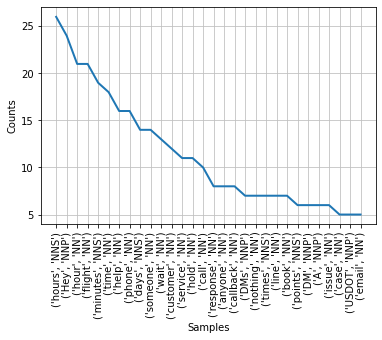

[(('hours', 'NNS'), 26), (('Hey', 'NNP'), 24), (('hour', 'NN'), 21), (('flight', 'NN'), 21), (('minutes', 'NNS'), 19), (('time', 'NN'), 18), (('help', 'NN'), 16), (('phone', 'NN'), 16), (('days', 'NNS'), 14), (('someone', 'NN'), 14), (('wait', 'NN'), 13), (('customer', 'NN'), 12), (('service', 'NN'), 11), (('hold', 'NN'), 11), (('call', 'NN'), 10), (('response', 'NN'), 8), (('anyone', 'NN'), 8), (('callback', 'NN'), 8), (('DMs', 'NNP'), 7), (('nothing', 'NN'), 7), (('times', 'NNS'), 7), (('line', 'NN'), 7), (('book', 'NN'), 7), (('points', 'NNS'), 6), (('DM', 'NNP'), 6), (('A', 'NNP'), 6), (('issue', 'NN'), 6), (('case', 'NN'), 5), (('USDOT', 'NNP'), 5), (('email', 'NN'), 5)]


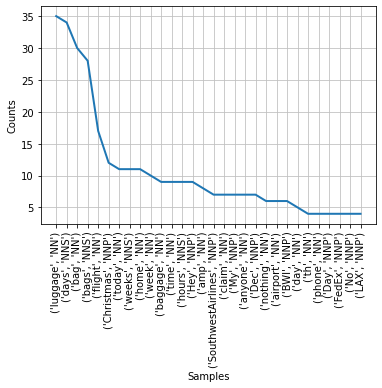

[(('luggage', 'NN'), 35), (('days', 'NNS'), 34), (('bag', 'NN'), 30), (('bags', 'NNS'), 28), (('flight', 'NN'), 17), (('Christmas', 'NNP'), 12), (('today', 'NN'), 11), (('weeks', 'NNS'), 11), (('home', 'NN'), 11), (('week', 'NN'), 10), (('baggage', 'NN'), 9), (('time', 'NN'), 9), (('hours', 'NNS'), 9), (('Hey', 'NNP'), 9), (('amp', 'NN'), 8), (('SouthwestAirlines', 'NNP'), 7), (('claim', 'NN'), 7), (('My', 'NNP'), 7), (('anyone', 'NN'), 7), (('Dec', 'NNP'), 7), (('nothing', 'NN'), 6), (('airport', 'NN'), 6), (('BWI', 'NNP'), 6), (('day', 'NN'), 5), (('th', 'NN'), 4), (('phone', 'NN'), 4), (('Day', 'NNP'), 4), (('FedEx', 'NNP'), 4), (('No', 'NNP'), 4), (('LAX', 'NNP'), 4)]


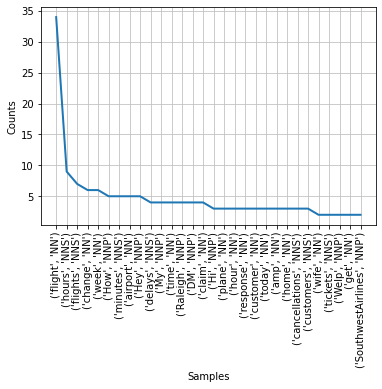

[(('flight', 'NN'), 34), (('hours', 'NNS'), 9), (('flights', 'NNS'), 7), (('change', 'NN'), 6), (('week', 'NN'), 6), (('How', 'NNP'), 5), (('minutes', 'NNS'), 5), (('airport', 'NN'), 5), (('Hey', 'NNP'), 5), (('delays', 'NNS'), 4), (('My', 'NNP'), 4), (('time', 'NN'), 4), (('Raleigh', 'NNP'), 4), (('DM', 'NNP'), 4), (('claim', 'NN'), 4), (('Hi', 'NNP'), 3), (('plane', 'NN'), 3), (('hour', 'NN'), 3), (('response', 'NN'), 3), (('customer', 'NN'), 3), (('today', 'NN'), 3), (('amp', 'NN'), 3), (('home', 'NN'), 3), (('cancellations', 'NNS'), 3), (('customers', 'NNS'), 3), (('wife', 'NN'), 2), (('tickets', 'NNS'), 2), (('Welp', 'NNP'), 2), (('get', 'NN'), 2), (('SouthwestAirlines', 'NNP'), 2)]


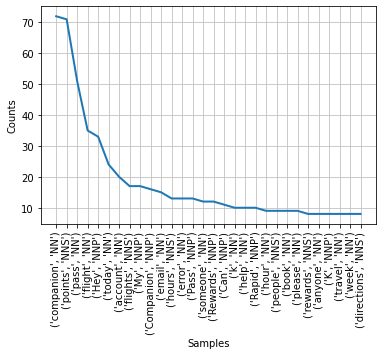

[(('companion', 'NN'), 72), (('points', 'NNS'), 71), (('pass', 'NN'), 51), (('flight', 'NN'), 35), (('Hey', 'NNP'), 33), (('today', 'NN'), 24), (('account', 'NN'), 20), (('flights', 'NNS'), 17), (('My', 'NNP'), 17), (('Companion', 'NNP'), 16), (('email', 'NN'), 15), (('hours', 'NNS'), 13), (('error', 'NN'), 13), (('Pass', 'NNP'), 13), (('someone', 'NN'), 12), (('Rewards', 'NNP'), 12), (('Can', 'NNP'), 11), (('k', 'NN'), 10), (('help', 'NN'), 10), (('Rapid', 'NNP'), 10), (('hour', 'NN'), 9), (('people', 'NNS'), 9), (('book', 'NN'), 9), (('please', 'NN'), 9), (('rewards', 'NNS'), 8), (('anyone', 'NN'), 8), (('K', 'NNP'), 8), (('travel', 'NN'), 8), (('week', 'NN'), 8), (('directions', 'NNS'), 8)]


In [10]:
def freqdist_nouns(original_text_column):
    
    #join all tweets into a single string and tokenize 
    content_list = list(original_text_column)
    content_string = ' '.join(content_list)
    content_tokens = nltk.word_tokenize(content_string)
    
    #create tags 
    POS_tags = nltk.pos_tag(content_tokens)
    
    #get words with tag that starts with N only 
    #Generate a list of POS tags
    POS_tag_list = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')] 
    
    #get the frequency distribution
    tag_freq = nltk.FreqDist(POS_tag_list)
    sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)
    
    #plot word frequency
    tag_freq.plot(30)
    
    #print and save top 30 words
    print(sorted_tag_freq[:30])
    return sorted_tag_freq[:30] 

#get top 30 highest frequency nouns by applying function -- also shows word cloud and freq dist chart
top_30_n_noresponse = freqdist_nouns(df_no_response['corpus_freq_noun'])   
top_30_n_ref_req = freqdist_nouns(df_refund_req['corpus_freq_noun'])
top_30_n_others= freqdist_nouns(df_others['corpus_freq_noun'])
top_30_n_baggage = freqdist_nouns(df_baggage['corpus_freq_noun'])
top_30_n_flight_changes = freqdist_nouns(df_flight_changes['corpus_freq_noun'])
top_30_n_rapid_rewards = freqdist_nouns(df_rapid_rewards['corpus_freq_noun'])

# Sentiment Analysis

## 1. Multi-Classification Approach

In [11]:
#Initialize the Afinn sentiment analyzer
afinn = Afinn()

# Apply the Afinn score function to each tweet
df["afinn_score"] = df["corpus_sentiment"].apply(afinn.score)

# Display the DataFrame with the Afinn scores
df[["corpus_sentiment", "afinn_score"]].head()


,corpus_sentiment,afinn_score
0,bullshit jim_jordan trump and his failed respo...,-14.0
1,let s try this one more more time who can help...,6.0
2,hey petebuttigieg you were pointing the finger...,3.0
3,southwestairlines got my refund today just be ...,1.0
4,your girl is out here matching with the monito...,0.0


In [12]:
df_response = df[df.result != "No response needed"]
mean_afinn_score = df_response["afinn_score"].mean()
print(f"Mean Afinn Score of all response needed tweets: {mean_afinn_score}")

Mean Afinn Score of all response needed tweets: -0.2522255192878338


In [13]:
def classify_tweet_afinn(tweet ,threshold):
    sentiment_score = afinn.score(tweet)
    tokens = set(word_tokenize(tweet))

    flight_related = tokens.intersection({"flight", "flights"})
    delay_or_cancellation = tokens.intersection({"delay", "delayed", "cancellation", "cancelled", "canceld", "cancel"})
    help_related = tokens.intersection({"?", "help", "when", "no response", "expect", "update", "receive", "waiting"})

    seats_help = tokens.intersection({"seat", "seating", "seats"})
    covid19 = tokens.intersection({"covid", "corona"})
    others_help = tokens.intersection({"help", "hold", "?"})
    rapid_rewards_help = tokens.intersection({"reward", "point", "rapid", "companion", "pass"})

    luggage_related = tokens.intersection({"luggage", "bag", "baggage", "suitcase"})
    baggage_issues = tokens.intersection({"find", "lost", "lose", "missing", "damaged", "tracking"})

    reimbursement_related = tokens.intersection({"reimbursement", "reimbursements"})
    refund_related = tokens.intersection({"refund", "refunded", "refunds"})

    if sentiment_score < threshold:
        if flight_related and delay_or_cancellation and help_related:
            return "Flight Changes & Cancellation"
        elif luggage_related and baggage_issues:
            return "Baggage Help"
        elif refund_related or (reimbursement_related and tokens.intersection({"cancelled", "cancellation"})):
            return "Refund Request & Status Help"
        elif rapid_rewards_help:
            return "Rapid Rewards Help"
        elif covid19:
            return "Covid19"
        elif seats_help and others_help:
            return "Seats Help"
        elif others_help and not any(
            tokens.intersection(dictionary) for dictionary in [
                ((flight_related or delay_or_cancellation) and help_related), seats_help, (luggage_related and baggage_issues),
                rapid_rewards_help, covid19, ((refund_related or reimbursement_related) and tokens.intersection({"cancelled", "cancellation"}))]):
            return "Others - help needed"

    # If the sentiment score is not less than 0 or doesn't match any dictionary conditions, classify as no response needed
    return "No response needed"

In [14]:
df['classification_threshold_5'] = df['corpus_sentiment'].apply(lambda x: classify_tweet_afinn(x, 5))

accuracy = (df["classification_threshold_5"] == df["result"]).mean()
print(f"Accuracy with sentiment score under 5: {accuracy * 100:.2f}%")

Accuracy with sentiment score under 5: 68.03%


In [15]:
df["classification_threshold_min5"] = df["corpus_sentiment"].apply(lambda x: classify_tweet_afinn(x, -5))

accuracy = (df["classification_threshold_min5"] == df["result"]).mean()
print(f"Accuracy with sentiment score under -5: {accuracy * 100:.2f}%")

Accuracy with sentiment score under -5: 76.62%


In [16]:
df[df["result"] == "Flight Changes & Cancellation"]

,text,result,processed_text,corpus_freq_noun,corpus_sentiment,afinn_score,classification_threshold_5,classification_threshold_min5
19,Hi @SouthwestAir @FAANews will flights be canc...,Flight Changes & Cancellation,hi faanews flight canceled tomorrow well,Hi FAANews flights canceled tomorrow well,hi faanews will flights be canceled tomorrow a...,0.0,No response needed,No response needed
40,"WTF, @SouthwestAir. After long delays, my son,...",Flight Changes & Cancellation,wtf long delay son wife small child deplane on...,WTF After long delays son wife small children ...,wtf after long delays my son wife and 4 small ...,-4.0,Rapid Rewards Help,No response needed
53,Welp I wanted to give @SouthwestAir another tr...,Flight Changes & Cancellation,welp wanted give another try since huge disast...,Welp I wanted give another try since HUGE disa...,welp i wanted to give another try since the hu...,1.0,No response needed,No response needed
97,I'm still waiting on a response from @Southwes...,Flight Changes & Cancellation,still waiting response regarding trip bwi san ...,I still waiting response regarding trip BWI Sa...,i m still waiting on a response from regarding...,-1.0,No response needed,No response needed
105,If my first flight gets cancelled and then the...,Flight Changes & Cancellation,first flight get cancelled one get rebooked ke...,If first flight gets cancelled one I get reboo...,if my first flight gets cancelled and then the...,-2.0,Flight Changes & Cancellation,No response needed
118,Ok; @SouthwestAir you’ve adjusted my flight ti...,Flight Changes & Cancellation,ok adjusted flight time x since already checke...,Ok adjusted flight time Xs since We already ch...,ok you ve adjusted my flight time 6xs since 7 ...,-6.0,Flight Changes & Cancellation,Flight Changes & Cancellation
161,How @SouthwestAir expects me to get to airport...,Flight Changes & Cancellation,expects get airport receiving text rebooked fl...,How expects get airport receiving text rebooke...,how expects me to get to airport after receivi...,-3.0,No response needed,No response needed
173,Ok @SouthwestAir I’m trying to change my fligh...,Flight Changes & Cancellation,ok trying change flight scheduled leave today ...,Ok I trying change flight scheduled leave toda...,ok i m trying to change my flight scheduled to...,2.0,No response needed,No response needed
237,"Welp, @SouthwestAir is at it again! They cance...",Flight Changes & Cancellation,welp cancelled flight afternoon rebooked hour ...,Welp They cancelled flights afternoon rebooked...,welp is at it again they cancelled our flights...,-1.0,No response needed,No response needed
240,Supposed to be flying out today but now all fl...,Flight Changes & Cancellation,supposed flying today flight canceled risk stu...,Supposed flying today flight canceled I risk s...,supposed to be flying out today but now all fl...,-4.0,No response needed,No response needed


## 2. Binary Approach

In [21]:
df['binary_result'] = df['result'].apply(lambda x: 0 if x == 'No response needed' else 1)
df['binary_classification_threshold_5'] = df['classification_threshold_5'].apply(lambda x: 0 if x == 'No response needed' else 1)
df['binary_classification_threshold_min5'] = df['classification_threshold_min5'].apply(lambda x: 0 if x == 'No response needed' else 1)

accuracy = (df["binary_classification_threshold_5"] == df["binary_result"]).mean()
print(f"Accuracy in binary with sentiment score under 5: {accuracy * 100:.2f}%")

accuracy = (df["binary_classification_threshold_min5"] == df["binary_result"]).mean()
print(f"Accuracy in binary with sentiment score under -5: {accuracy * 100:.2f}%")



Accuracy in binary with sentiment score under 5: 72.64%
Accuracy in binary with sentiment score under -5: 76.75%


In [ ]:
df[df["binary_classification_threshold_5"] == 1]
df[df["binary_classification_threshold_min5"] == 1]


## Ensemble Method

Best Performances

LOGISTIC REGRESSION with Frequency Method: Accuracy = 0.866576819407008

In [22]:
import numpy as np
import xgboost as xgb

#ML libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB # import naive bayes
from sklearn.tree import DecisionTreeClassifier # import Decision Tree
from sklearn.ensemble import RandomForestClassifier # import random forest

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


###################################
#READ DATAFRAME WITH CLEAN COLUMNS#
""" READ DF AND SPLIT DATA """
###################################


df['result'].value_counts()

#remove seat help because not enough records
# df = df[df.result != 'Seats Help']


###########################################
#ADD RESPONSE VS NO RESPONSE NEEDED COLUMN#
""" Generate new column: response_needed """
###########################################

#create new column 'response_needed' where 1 = response is needed and 0 = no response needed
# df['response_needed'] = np.where(df['result'] == 'No response needed', 0, 1) 


train_corpus, test_corpus, train_labels, test_labels = train_test_split(df['processed_text'], df['binary_result'], 
                                                                        random_state=10,
                                                                        stratify=df['binary_result'])


##############################
#    FEATURE ENGINEERING     #
""" COUNT, BINARY, TF-IDF """
##############################

#BAG OF WORDS (Frequency)
# build bag of words features' vectorizer and get features
bow_vectorizer_freq = CountVectorizer(min_df=1, ngram_range=(1,1))
bow_train_features_freq = bow_vectorizer_freq.fit_transform(train_corpus)
bow_test_features_freq = bow_vectorizer_freq.transform(test_corpus)

#BAG OF WORDS (binary)
# build bag of words features' vectorizer and get features
bow_vectorizer_binary = CountVectorizer(min_df=1, ngram_range=(1,1), binary=True)
bow_train_features_binary = bow_vectorizer_binary.fit_transform(train_corpus)
bow_test_features_binary = bow_vectorizer_binary.transform(test_corpus)

#Tf-idf 
# build tfidf features' vectorizer and get features
tfidf_vectorizer=TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1))
tfidf_train_features = tfidf_vectorizer.fit_transform(train_corpus)  
tfidf_test_features = tfidf_vectorizer.transform(test_corpus)

#################################
#       FUNCTION BUILDING       #
""" BUILDS MODEL AND EVALUATES""" 
#################################

#BUILDING FUNCTIONS FOR MODEL BUILDING AND EVAL

#creates confusion matrix and calculates precision, recall, f-measure, etc. 
def evaluator(model, train_features, test_features ,t_labels = train_labels, tst_labels = test_labels):
    model.fit(train_features, t_labels)
    # predict using model
    predictions = model.predict(test_features) 
    # confusion matrix
    confusion_matrix_simple = metrics.confusion_matrix(tst_labels, predictions)

    print(metrics.classification_report(tst_labels,predictions))
    print('confusion matrix: ', '\n', confusion_matrix_simple)
    print('accuracy score: ', accuracy_score(tst_labels, predictions))

###########################
#   MODEL IMPLEMENTATION  # 
""" Naive Bayes, DT, RF """
###########################

print(""" NAIVE BAYES """)
# assign naive bayes function to an object 
mnb = MultinomialNB()

# NAIVE BAYES MODEL: BINARY METHOD 
evaluator(mnb, bow_train_features_binary, bow_test_features_binary)

# NAIVE BAYES MODEL: FREQUENCY METHOD
evaluator(mnb, bow_train_features_freq, bow_test_features_freq)

# NAIVE BAYES MODEL: TF-IDF METHOD 
evaluator(mnb, tfidf_train_features, tfidf_test_features)


print(""" DECISION TREE """)

# assign decision tree function to an object
dt = DecisionTreeClassifier()

# DECISION TREE MODEL: BINARY METHOD 
evaluator(dt, bow_train_features_binary, bow_test_features_binary)

# DECISION TREE MODEL: FREQUECY METHOD 
evaluator(dt, bow_train_features_freq, bow_test_features_freq)

# DECISION TREE MODEL: TF-IDF 
evaluator(dt, tfidf_train_features, tfidf_test_features)

print(""" RANDOM FOREST """)
# assign decision tree function to an object
rf = RandomForestClassifier()

# RANDOM FOREST MODEL: BINARY METHOD 
evaluator(rf, bow_train_features_binary, bow_test_features_binary)

# RANDOM FOREST: FREQUENCY METHOD 
evaluator(rf, bow_train_features_freq, bow_test_features_freq)

# RANDOM FOREST: TF-IDF METHOD 
evaluator(rf, tfidf_train_features, tfidf_test_features)

print(""" LOGISTIC REGRESSION """)

# Assign logistic regression function to an object
logreg = LogisticRegression()

# LOGISTIC REGRESSION MODEL: BINARY METHOD
evaluator(logreg, bow_train_features_binary, bow_test_features_binary)

# LOGISTIC REGRESSION MODEL: FREQUENCY METHOD
evaluator(logreg, bow_train_features_freq, bow_test_features_freq)

# LOGISTIC REGRESSION MODEL: TF-IDF METHOD
evaluator(logreg, tfidf_train_features, tfidf_test_features)

print(""" SUPPORT VECTOR MACHINE (SVM) """)

# Assign SVM function to an object
svm = SVC()

# SVM MODEL: BINARY METHOD
evaluator(svm, bow_train_features_binary, bow_test_features_binary)

# SVM MODEL: FREQUENCY METHOD
evaluator(svm, bow_train_features_freq, bow_test_features_freq)

# SVM MODEL: TF-IDF METHOD
evaluator(svm, tfidf_train_features, tfidf_test_features)

print(""" XGBOOST """)

# Assign XGBoost function to an object
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# XGBOOST MODEL: BINARY METHOD
evaluator(xgboost_model, bow_train_features_binary, bow_test_features_binary)

# XGBOOST MODEL: FREQUENCY METHOD
evaluator(xgboost_model, bow_train_features_freq, bow_test_features_freq)

# XGBOOST MODEL: TF-IDF METHOD
evaluator(xgboost_model, tfidf_train_features, tfidf_test_features)



 NAIVE BAYES 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       573
           1       0.72      0.71      0.72       169

    accuracy                           0.87       742
   macro avg       0.82      0.81      0.82       742
weighted avg       0.87      0.87      0.87       742

confusion matrix:  
 [[527  46]
 [ 49 120]]
accuracy score:  0.871967654986523
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       573
           1       0.70      0.72      0.71       169

    accuracy                           0.87       742
   macro avg       0.81      0.81      0.81       742
weighted avg       0.87      0.87      0.87       742

confusion matrix:  
 [[522  51]
 [ 48 121]]
accuracy score:  0.866576819407008
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       573
           1       0.95      0.12      0.22       169

    accura

/Users/chiehlinghuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.89      0.92      0.90       573
           1       0.68      0.60      0.64       169

    accuracy                           0.85       742
   macro avg       0.78      0.76      0.77       742
weighted avg       0.84      0.85      0.84       742

confusion matrix:  
 [[525  48]
 [ 67 102]]
accuracy score:  0.8450134770889488
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       573
           1       0.68      0.60      0.64       169

    accuracy                           0.84       742
   macro avg       0.78      0.76      0.77       742
weighted avg       0.84      0.84      0.84       742

confusion matrix:  
 [[524  49]
 [ 67 102]]
accuracy score:  0.8436657681940701


### Machine Learning

## Logistic Regression (Example)

### Binary Method (CountVectorizer)

In [23]:
from scipy.sparse import hstack

# Initialize CountVectorizer with binary=True
binary_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1), binary=True)
binary_features = binary_vectorizer.fit_transform(df['processed_text'])

y = df["binary_result"]

# Add sentiment scores as a new column to the binary feature matrix
combined_features = hstack([binary_features, df['afinn_score'].values.reshape(-1, 1)])

X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression model accuracy: ", accuracy)

Logistic Regression model accuracy:  0.8888888888888888


### Frequency Method (CountVector)

In [24]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
count_features = count_vectorizer.fit_transform(df['processed_text'])

y = df["binary_result"]

# Add sentiment scores as a new column to the frequency feature matrix
combined_features = hstack([count_features, df['afinn_score'].values.reshape(-1, 1)])

X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression model accuracy: ", accuracy)

Logistic Regression model accuracy:  0.877104377104377


### Frequency Method (TfidfVectorizer)

In [25]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, norm='l2', smooth_idf=True, use_idf=True, ngram_range=(1,1))
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text'])

from scipy.sparse import hstack

y = df["binary_result"]

# Add sentiment scores as a new column to the TF-IDF feature matrix
combined_features = hstack([tfidf_features, df['afinn_score'].values.reshape(-1, 1)])

X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression model accuracy: ", accuracy)


Logistic Regression model accuracy:  0.8804713804713805
